## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  25.679316   773.749925  0.020115   8.254091  0.451313
1  17.704784  1457.423600  0.670473   7.268098  1.555907
2  71.949084  1261.410523  0.812254   9.159768  1.524880
3  98.777104  1158.868858  0.834385   1.331968  1.520452
4  26.439383  1660.137762  0.338780  10.518370  1.483703


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9800608	total: 64.8ms	remaining: 1m 4s
1:	learn: 0.9721463	total: 65.7ms	remaining: 32.8s
2:	learn: 0.9607011	total: 66.3ms	remaining: 22s
3:	learn: 0.9474370	total: 67ms	remaining: 16.7s
4:	learn: 0.9373237	total: 67.7ms	remaining: 13.5s
5:	learn: 0.9299950	total: 68.3ms	remaining: 11.3s
6:	learn: 0.9194707	total: 68.9ms	remaining: 9.78s
7:	learn: 0.9099261	total: 69.5ms	remaining: 8.62s
8:	learn: 0.9009780	total: 70.3ms	remaining: 7.74s
9:	learn: 0.8887767	total: 70.8ms	remaining: 7.01s
10:	learn: 0.8801798	total: 71.4ms	remaining: 6.42s
11:	learn: 0.8694930	total: 71.9ms	remaining: 5.92s
12:	learn: 0.8605257	total: 72.5ms	remaining: 5.5s
13:	learn: 0.8498004	total: 73ms	remaining: 5.14s
14:	learn: 0.8400307	total: 73.6ms	remaining: 4.83s
15:	learn: 0.8303382	total: 74.2ms	remaining: 4.56s
16:	learn: 0.8191856	total: 74.7ms	remaining: 4.32s
17:	learn: 0.8124850	total: 75.3ms	remaining: 4.11s
18:	learn: 0.8054099	total: 75.8ms	remaining: 3.91s

21:	learn: 0.7809553	total: 78.8ms	remaining: 3.5s
22:	learn: 0.7725607	total: 80.1ms	remaining: 3.4s
23:	learn: 0.7661733	total: 80.7ms	remaining: 3.28s
24:	learn: 0.7572025	total: 81.2ms	remaining: 3.17s
25:	learn: 0.7491182	total: 81.8ms	remaining: 3.06s
26:	learn: 0.7413887	total: 82.3ms	remaining: 2.97s
27:	learn: 0.7324095	total: 82.8ms	remaining: 2.88s
28:	learn: 0.7247957	total: 83.3ms	remaining: 2.79s
29:	learn: 0.7167229	total: 83.9ms	remaining: 2.71s
30:	learn: 0.7105784	total: 84.3ms	remaining: 2.64s
31:	learn: 0.7033861	total: 84.8ms	remaining: 2.57s
32:	learn: 0.6987873	total: 85.5ms	remaining: 2.5s
33:	learn: 0.6945773	total: 86ms	remaining: 2.44s
34:	learn: 0.6881803	total: 86.6ms	remaining: 2.39s
35:	learn: 0.6829022	total: 87.1ms	remaining: 2.33s
36:	learn: 0.6740504	total: 87.7ms	remaining: 2.28s
37:	learn: 0.6682831	total: 88.1ms	remaining: 2.23s
38:	learn: 0.6627215	total: 88.6ms	remaining: 2.18s
39:	learn: 0.6541592	total: 89.1ms	remaining: 2.14s
40:	learn: 0.6479

215:	learn: 0.2012887	total: 167ms	remaining: 607ms
216:	learn: 0.2003310	total: 168ms	remaining: 605ms
217:	learn: 0.1995843	total: 168ms	remaining: 603ms
218:	learn: 0.1988008	total: 169ms	remaining: 602ms
219:	learn: 0.1981647	total: 169ms	remaining: 599ms
220:	learn: 0.1973876	total: 170ms	remaining: 598ms
221:	learn: 0.1963514	total: 170ms	remaining: 596ms
222:	learn: 0.1953053	total: 170ms	remaining: 594ms
223:	learn: 0.1942596	total: 171ms	remaining: 592ms
224:	learn: 0.1935748	total: 171ms	remaining: 590ms
225:	learn: 0.1928273	total: 172ms	remaining: 588ms
226:	learn: 0.1922430	total: 172ms	remaining: 586ms
227:	learn: 0.1913566	total: 172ms	remaining: 583ms
228:	learn: 0.1902546	total: 173ms	remaining: 581ms
229:	learn: 0.1897111	total: 173ms	remaining: 579ms
230:	learn: 0.1887780	total: 173ms	remaining: 577ms
231:	learn: 0.1880458	total: 174ms	remaining: 575ms
232:	learn: 0.1874686	total: 174ms	remaining: 573ms
233:	learn: 0.1867327	total: 174ms	remaining: 571ms
234:	learn: 

390:	learn: 0.1245292	total: 238ms	remaining: 370ms
391:	learn: 0.1244069	total: 239ms	remaining: 371ms
392:	learn: 0.1239946	total: 240ms	remaining: 370ms
393:	learn: 0.1239182	total: 240ms	remaining: 369ms
394:	learn: 0.1238435	total: 241ms	remaining: 369ms
395:	learn: 0.1237273	total: 241ms	remaining: 367ms
396:	learn: 0.1232397	total: 241ms	remaining: 366ms
397:	learn: 0.1228365	total: 242ms	remaining: 366ms
398:	learn: 0.1227376	total: 242ms	remaining: 365ms
399:	learn: 0.1222641	total: 242ms	remaining: 364ms
400:	learn: 0.1217940	total: 243ms	remaining: 363ms
401:	learn: 0.1214094	total: 244ms	remaining: 362ms
402:	learn: 0.1210315	total: 244ms	remaining: 362ms
403:	learn: 0.1206649	total: 244ms	remaining: 361ms
404:	learn: 0.1203837	total: 245ms	remaining: 360ms
405:	learn: 0.1200385	total: 245ms	remaining: 359ms
406:	learn: 0.1195860	total: 246ms	remaining: 358ms
407:	learn: 0.1192301	total: 246ms	remaining: 357ms
408:	learn: 0.1187900	total: 247ms	remaining: 356ms
409:	learn: 

597:	learn: 0.0732148	total: 329ms	remaining: 221ms
598:	learn: 0.0731630	total: 330ms	remaining: 221ms
599:	learn: 0.0730709	total: 330ms	remaining: 220ms
600:	learn: 0.0730065	total: 331ms	remaining: 220ms
601:	learn: 0.0728949	total: 331ms	remaining: 219ms
602:	learn: 0.0727221	total: 332ms	remaining: 218ms
603:	learn: 0.0725525	total: 332ms	remaining: 218ms
604:	learn: 0.0724432	total: 332ms	remaining: 217ms
605:	learn: 0.0720526	total: 333ms	remaining: 216ms
606:	learn: 0.0718685	total: 333ms	remaining: 216ms
607:	learn: 0.0714882	total: 334ms	remaining: 215ms
608:	learn: 0.0714434	total: 334ms	remaining: 214ms
609:	learn: 0.0711933	total: 334ms	remaining: 214ms
610:	learn: 0.0708230	total: 335ms	remaining: 213ms
611:	learn: 0.0704609	total: 335ms	remaining: 213ms
612:	learn: 0.0704251	total: 336ms	remaining: 212ms
613:	learn: 0.0701829	total: 336ms	remaining: 211ms
614:	learn: 0.0699136	total: 337ms	remaining: 211ms
615:	learn: 0.0698787	total: 337ms	remaining: 210ms
616:	learn: 

773:	learn: 0.0487592	total: 403ms	remaining: 118ms
774:	learn: 0.0487073	total: 403ms	remaining: 117ms
775:	learn: 0.0485897	total: 404ms	remaining: 117ms
776:	learn: 0.0485303	total: 404ms	remaining: 116ms
777:	learn: 0.0484995	total: 405ms	remaining: 115ms
778:	learn: 0.0484311	total: 405ms	remaining: 115ms
779:	learn: 0.0483044	total: 406ms	remaining: 114ms
780:	learn: 0.0482370	total: 406ms	remaining: 114ms
781:	learn: 0.0481721	total: 407ms	remaining: 113ms
782:	learn: 0.0481083	total: 407ms	remaining: 113ms
783:	learn: 0.0479703	total: 407ms	remaining: 112ms
784:	learn: 0.0479038	total: 408ms	remaining: 112ms
785:	learn: 0.0477406	total: 408ms	remaining: 111ms
786:	learn: 0.0476187	total: 408ms	remaining: 111ms
787:	learn: 0.0474801	total: 409ms	remaining: 110ms
788:	learn: 0.0473529	total: 409ms	remaining: 109ms
789:	learn: 0.0471936	total: 410ms	remaining: 109ms
790:	learn: 0.0470716	total: 410ms	remaining: 108ms
791:	learn: 0.0469609	total: 411ms	remaining: 108ms
792:	learn: 

989:	learn: 0.0311878	total: 492ms	remaining: 4.97ms
990:	learn: 0.0310690	total: 493ms	remaining: 4.48ms
991:	learn: 0.0309725	total: 493ms	remaining: 3.98ms
992:	learn: 0.0308253	total: 494ms	remaining: 3.48ms
993:	learn: 0.0306877	total: 494ms	remaining: 2.98ms
994:	learn: 0.0305739	total: 495ms	remaining: 2.49ms
995:	learn: 0.0304797	total: 495ms	remaining: 1.99ms
996:	learn: 0.0303392	total: 495ms	remaining: 1.49ms
997:	learn: 0.0302284	total: 496ms	remaining: 993us
998:	learn: 0.0300908	total: 496ms	remaining: 496us
999:	learn: 0.0299508	total: 497ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.30284318758077744


ABC Pre-generator MAE 0.3036078490450581


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

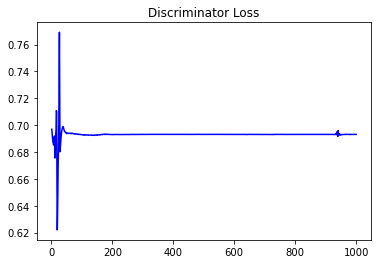

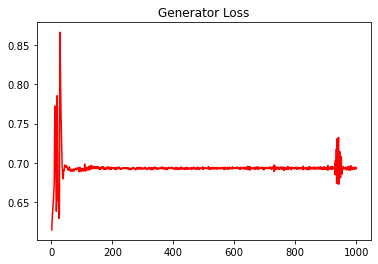

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.31068357226240917


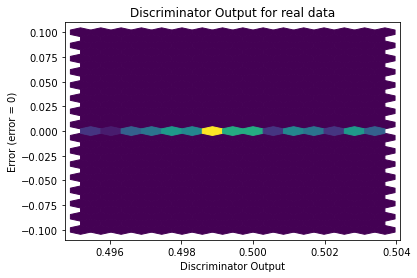

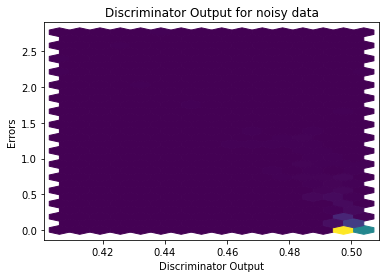

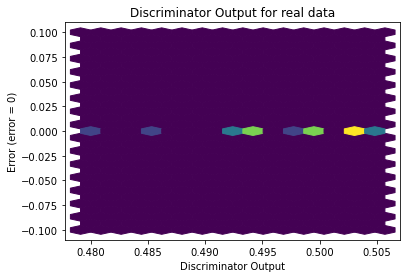

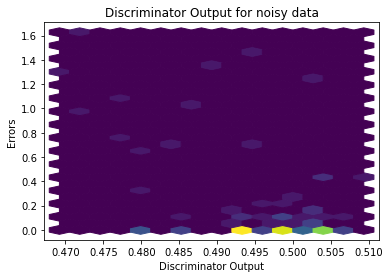

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

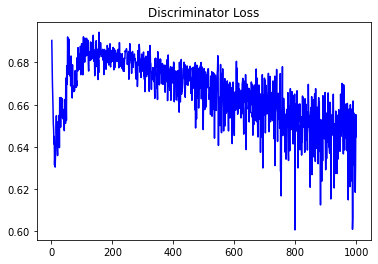

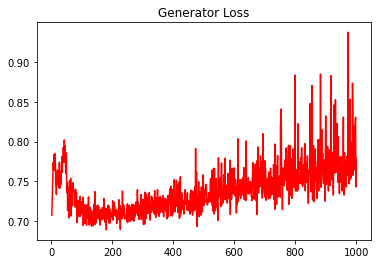

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.26082565636199434


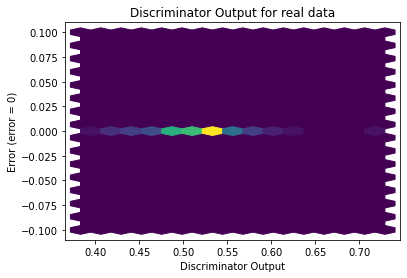

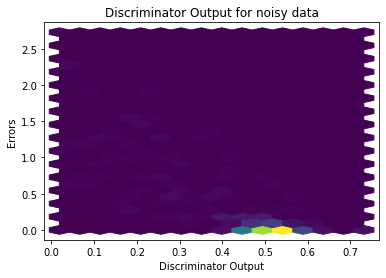

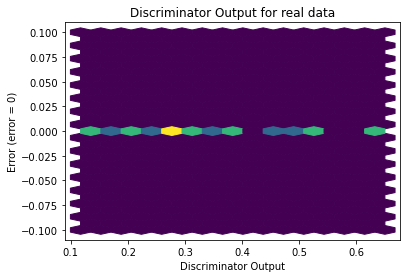

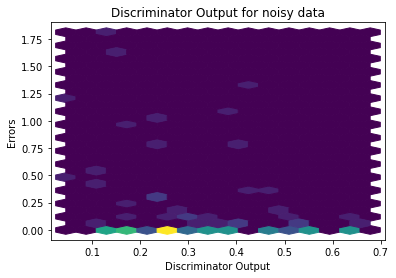

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


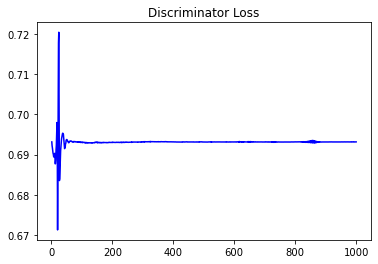

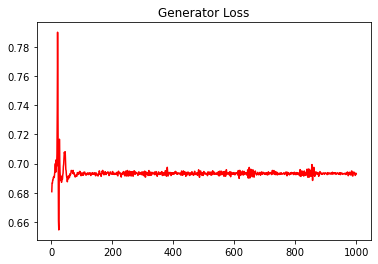

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.32689412375946997


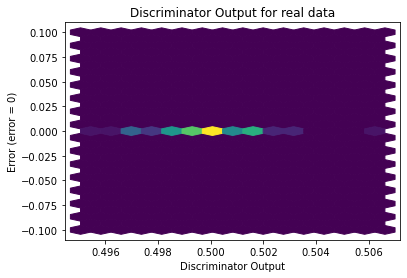

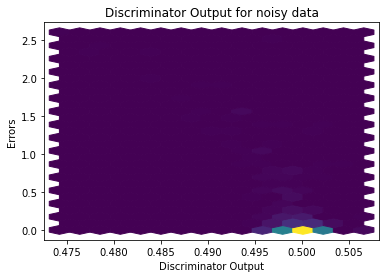

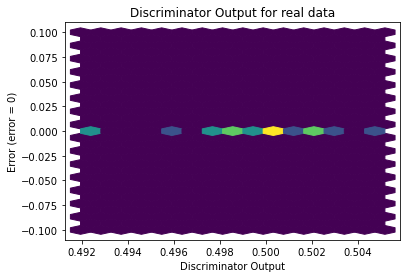

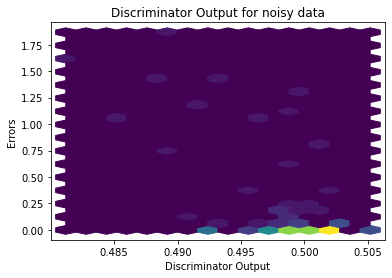

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


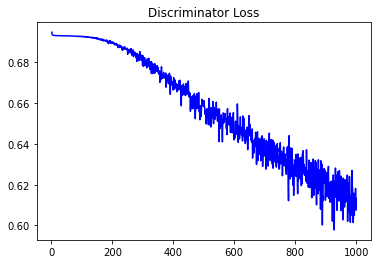

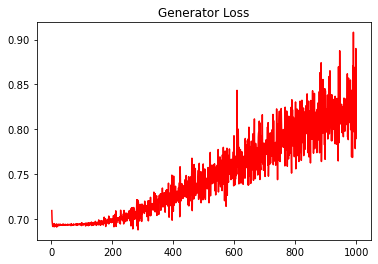

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3021825398715009


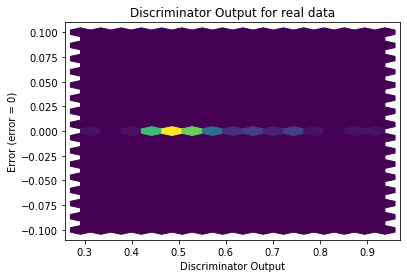

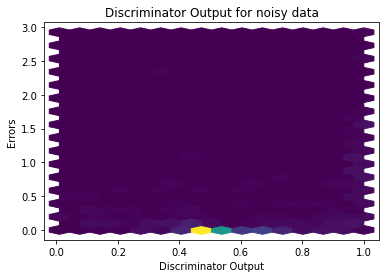

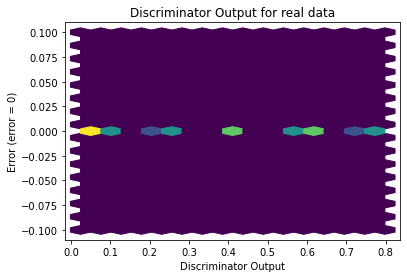

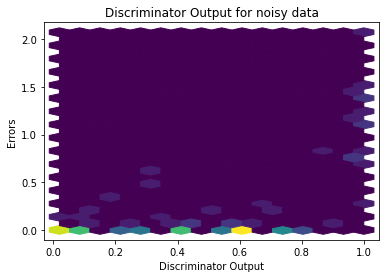

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3192]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
